In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv("arquivo_loteca1.csv")

In [4]:
df.head()

,Unnamed: 0,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res,H_Goals_Scored,A_Goals_Scored,H_Goals_Against,A_Goals_Against
0,0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A,0,0,0,0
1,1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H,0,0,0,0
2,2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H,0,0,0,0
3,3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A,0,0,0,0
4,4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H,0,0,0,0


<BarContainer object of 3 artists>

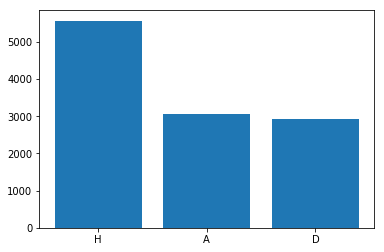

In [5]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

In [171]:
vocab = df18['Home'].unique()

In [172]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [173]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [174]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    vec = [word2vector(H), word2vector(A)]
#     return [word2vector(H), word2vector(A)]
    return np.array(vec).reshape(np.array(vec).shape[1]*2)

In [182]:
y = []

for d in df18[['Res']]['Res']:
    if d == 'H':
        y.append([1,0,0])
    if d == 'D':
        y.append([0,1,0])
    if d == 'A':
        y.append([0,0,1])
    if d != 'H' and d != 'A' and d != 'D':
        y.append([0,0,0])

In [184]:
y1 = np.array(y).reshape(np.array(y).shape[0],3)

In [175]:
X = []

for _, row in df18.iterrows():
    X.append(prepare(row['Home'], row['Away']))   

In [177]:
X1 = np.array(X).reshape(np.array(X).shape[0],1,len(vocab)*2)

In [178]:
X1

array([[[1., 0., 0., ..., 0., 1., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [179]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, TimeDistributed
from keras.layers import Embedding, Activation
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64))  # return a single vector of dimension 32model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

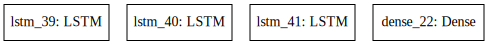

In [180]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, shuffle=True)

In [186]:
model.fit(X_train, y_train, batch_size=1000, epochs=20)
score = model.evaluate(X_test, y_test, batch_size=16)

Epoch 1/20
200/200 [==============================] - 3s 14ms/step - loss: 0.6365 - acc: 0.6667
Epoch 2/20
200/200 [==============================] - 0s 90us/step - loss: 0.6344 - acc: 0.6667
Epoch 3/20
200/200 [==============================] - 0s 90us/step - loss: 0.6327 - acc: 0.6667
Epoch 4/20
200/200 [==============================] - 0s 85us/step - loss: 0.6311 - acc: 0.6667
Epoch 5/20
200/200 [==============================] - 0s 90us/step - loss: 0.6294 - acc: 0.6667
Epoch 6/20
200/200 [==============================] - 0s 95us/step - loss: 0.6275 - acc: 0.6667
Epoch 7/20
200/200 [==============================] - 0s 80us/step - loss: 0.6256 - acc: 0.6667
Epoch 8/20
200/200 [==============================] - 0s 90us/step - loss: 0.6235 - acc: 0.6667
Epoch 9/20
200/200 [==============================] - 0s 90us/step - loss: 0.6212 - acc: 0.6667
Epoch 10/20
200/200 [==============================] - 0s 100us/step - loss: 0.6187 - acc: 0.6667
Epoch 11/20
200/200 [=================

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)

In [187]:
score

[0.6048517052573387, 0.6599326765898502]

In [189]:
H = 'Atletico-MG'
A = 'Palmeiras'
x = np.array([word2vector(H), word2vector(A)]).reshape(1,1,len(vocab)*2)
p = model.predict(x, batch_size=None, verbose=0, steps=None)

In [190]:
p

array([[0.42345798, 0.28487357, 0.2916684 ]], dtype=float32)